In [5]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [18]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [19]:
# 📦 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set(style='whitegrid')

# 👀 Step 3: Quick look at the data
print(df.head())
print("\nColumns:", df.columns)
print("\nShape:", df.shape)



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Shape: (768, 9)


In [20]:
# 🔢 Step 4: Set seed and take a random sample of 25
np.random.seed(123)  # ensures repeatability
sample_df = df.sample(n=25)

# 📊 Step 5: Calculate mean and max of Glucose in sample and population
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()

population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# 💾 Save intermediate results
results_a = {
    "sample_mean": sample_mean_glucose,
    "sample_max": sample_max_glucose,
    "population_mean": population_mean_glucose,
    "population_max": population_max_glucose
}

print("\n--- Glucose Comparison ---")
for k, v in results_a.items():
    print(f"{k}: {v:.2f}")




--- Glucose Comparison ---
sample_mean: 130.36
sample_max: 197.00
population_mean: 120.89
population_max: 199.00


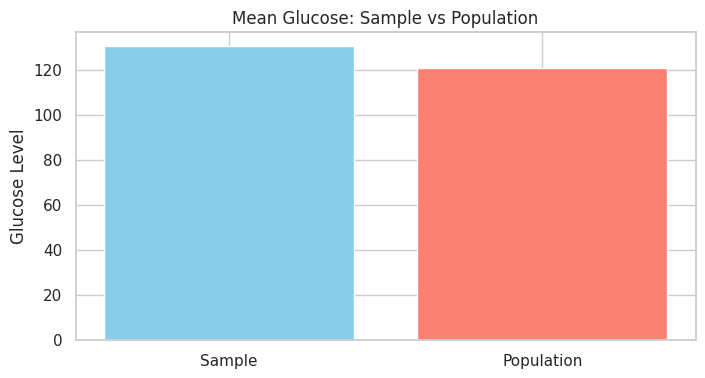

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

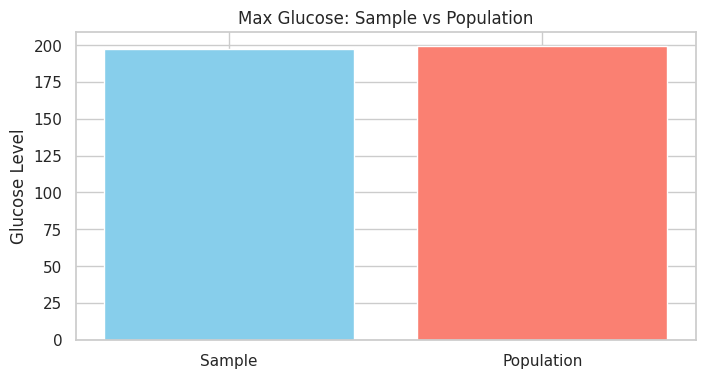

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [25]:
# 📉 Step 6: Create bar chart comparing mean and max
labels = ['Sample', 'Population']
means = [sample_mean_glucose, population_mean_glucose]
maxes = [sample_max_glucose, population_max_glucose]

# Plot mean comparison
plt.figure(figsize=(8, 4))
plt.bar(labels, means, color=['skyblue', 'salmon'])
plt.title('Mean Glucose: Sample vs Population')
plt.ylabel('Glucose Level')
plt.show()
plt.savefig("mean_glucose_comparison.png")
files.download("mean_glucose_comparison.png")

# Plot max comparison
plt.figure(figsize=(8, 4))
plt.bar(labels, maxes, color=['skyblue', 'salmon'])
plt.title('Max Glucose: Sample vs Population')
plt.ylabel('Glucose Level')
plt.show()
plt.savefig("max_glucose_comparison.png")

files.download("max_glucose_comparison.png")

Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.


--- 98th Percentile of BMI ---
sample_98th_percentile: 45.26
population_98th_percentile: 47.53


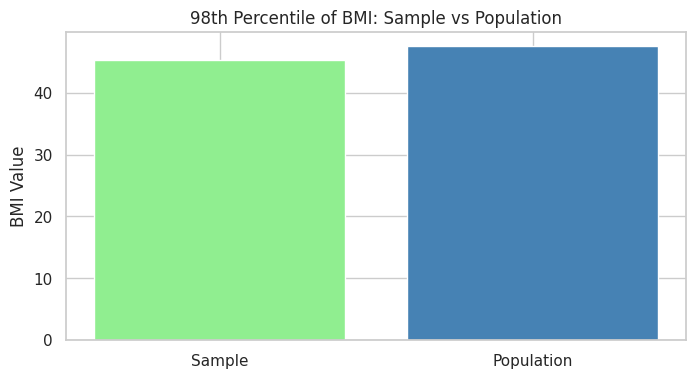

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 🎯 Step 1: Calculate the 98th percentile of BMI
sample_bmi_98 = np.percentile(sample_df['BMI'], 98)
population_bmi_98 = np.percentile(df['BMI'], 98)

# 💾 Save results
results_b = {
    "sample_98th_percentile": sample_bmi_98,
    "population_98th_percentile": population_bmi_98
}

print("\n--- 98th Percentile of BMI ---")
for k, v in results_b.items():
    print(f"{k}: {v:.2f}")

# 📉 Step 2: Create bar chart for comparison
labels = ['Sample', 'Population']
values = [sample_bmi_98, population_bmi_98]

plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['lightgreen', 'steelblue'])
plt.title('98th Percentile of BMI: Sample vs Population')
plt.ylabel('BMI Value')
plt.savefig("bmi_98th_percentile_comparison.png")
plt.show()

# ⬇️ Step 3: Optional - Download the chart
from google.colab import files
files.download("bmi_98th_percentile_comparison.png")


Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🎯 Step 1: Set seed again for reproducibility
np.random.seed(123)

# 📊 Step 2: Prepare to store bootstrap results
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# 🔁 Step 3: Perform bootstrap sampling 500 times
for _ in range(500):
    sample = df.sample(n=150, replace=True)
    blood_pressure = sample['BloodPressure']

    bootstrap_means.append(blood_pressure.mean())
    bootstrap_stds.append(blood_pressure.std())
    bootstrap_percentiles.append(np.percentile(blood_pressure, 98))

# 📈 Step 4: Calculate average of bootstrap stats
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_percentile = np.mean(bootstrap_percentiles)

# 📊 Step 5: Get population stats for BloodPressure
population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 98)

# 💾 Save results
results_c = {
    "Bootstrap Mean": avg_bootstrap_mean,
    "Population Mean": population_mean,
    "Bootstrap Std Dev": avg_bootstrap_std,
    "Population Std Dev": population_std,
    "Bootstrap 98th Percentile": avg_bootstrap_percentile,
    "Population 98th Percentile": population_percentile
}

# 🖨️ Print the results
print("\n--- Bootstrap vs Population (BloodPressure) ---")
for key, value in results_c.items():
    print(f"{key}: {value:.2f}")




--- Bootstrap vs Population (BloodPressure) ---
Bootstrap Mean: 69.15
Population Mean: 69.11
Bootstrap Std Dev: 19.19
Population Std Dev: 19.36
Bootstrap 98th Percentile: 98.03
Population 98th Percentile: 99.32


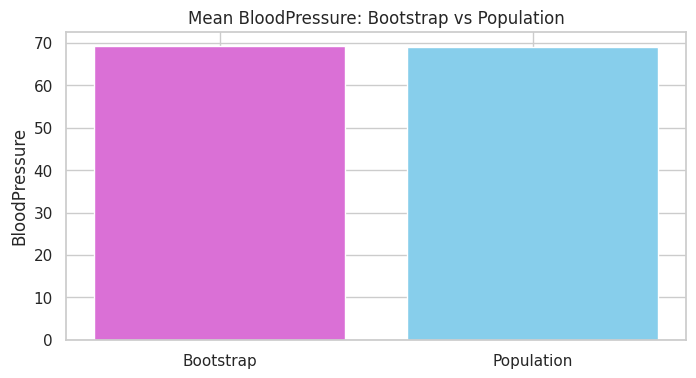

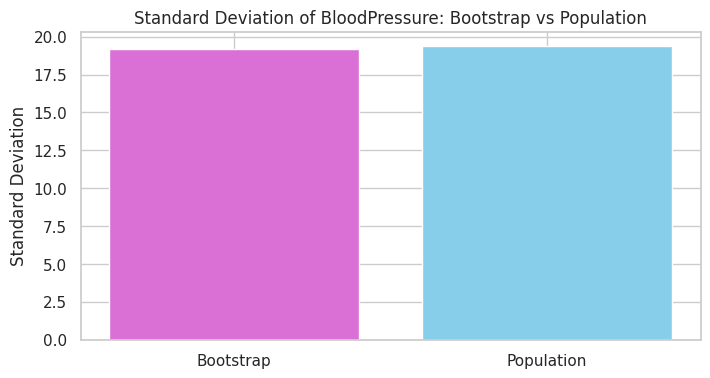

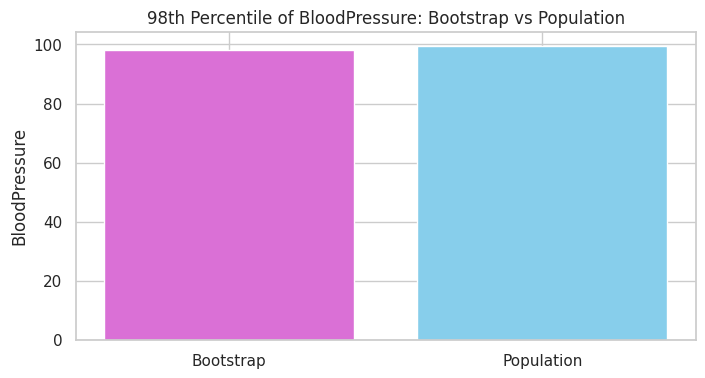

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:

# 📉 Step 6: Chart comparisons

# Mean Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Bootstrap', 'Population'], [avg_bootstrap_mean, population_mean], color=['orchid', 'skyblue'])
plt.title('Mean BloodPressure: Bootstrap vs Population')
plt.ylabel('BloodPressure')
plt.savefig("bp_mean_comparison.png")
plt.show()

# Std Dev Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Bootstrap', 'Population'], [avg_bootstrap_std, population_std], color=['orchid', 'skyblue'])
plt.title('Standard Deviation of BloodPressure: Bootstrap vs Population')
plt.ylabel('Standard Deviation')
plt.savefig("bp_std_comparison.png")
plt.show()

# 98th Percentile Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Bootstrap', 'Population'], [avg_bootstrap_percentile, population_percentile], color=['orchid', 'skyblue'])
plt.title('98th Percentile of BloodPressure: Bootstrap vs Population')
plt.ylabel('BloodPressure')
plt.savefig("bp_98th_percentile_comparison.png")
plt.show()

# ⬇️ Step 7: Download charts (optional)
from google.colab import files
files.download("bp_mean_comparison.png")
files.download("bp_std_comparison.png")
files.download("bp_98th_percentile_comparison.png")